# The Best Heart Disease Prediction 

### Goal: 

#### To train 3 statistical models on a dataset of individuals with Heart disease. The dataset was provided by DataKind.

### Problem type: 

#### Binary classification - Do they have heart disease? Yes or no?

### Models: 

#### Logistic Regression

Logistic regression works by...

Strengths....

Weaknesses....

#### K Nearest Neighbors Classifer

K Nearest Neightbors works by...

Strengths...

Weaknessess...


#### Naive Bayes (Gaussian)

Naive Bayes (Gaussian) works by...

Strengths...

Weaknesses..

### Walkthrough

Import Dependencies
Import Data
Explore Data
Process Data
Create Models
Fit Models
Test Models
Conclusion

### To Do

1. Explain each models (how it predicts, strenghts vs. weaknesses)
2. Log inference time for each model
3. Explain each attribute
4. Compare averages to national average, vs. world average
5. Identify if some correlations exist.
6. Implement cross validation and compare with current 80 to 20 split
7. Add interactive widget using interactive and ipywidget

### Import Dependencies

In [1]:
#General
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import ipywidgets as widgets

#classification models
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
from sklearn.model_selection import train_test_split

### Import Data

In [9]:
#training features
train_features = pd.read_csv(r'C:\Users\Yahkeef_Davis\Desktop\Data_Science\Heart_Disease_Kaggle\train_values.csv')

#training labels
train_labels   = pd.read_csv(r'C:\Users\Yahkeef_Davis\Desktop\Data_Science\Heart_Disease_Kaggle\train_labels.csv')

#merge features and labels
train_data = train_features.merge(train_labels)

## Explore Data

In [23]:
train_data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


Dropdown(description='Feature:', options=('Age', 'Resting Blood Pressure', 'Max Heart Rate Achieved', 'Serum C…

Max Heart Rate Achieved
Min: 96
Max: 202
Median: 152.0
Mean: 149.48333333333332


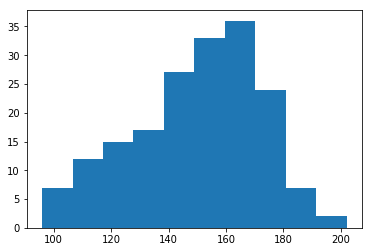

In [31]:
dropdown = widgets.Dropdown(
    options= ['Age', 'Resting Blood Pressure', 'Max Heart Rate Achieved', 'Serum Cholesterol'],
    value='Age',
    description='Feature:',
    disabled=False,
)

display(dropdown)

def summary(feature):
    print('Min: %s' %np.min(train_data[feature])) 
    print('Max: %s' %np.max(train_data[feature]))
    print('Median: %s' %np.median(train_data[feature]))
    print('Mean: %s' %np.mean(train_data[feature]))
    plt.hist(train_data[feature])
    
def summarize(change):
    if change['new'] == 'Age':
        feature = 'age'
    elif change['new'] == 'Resting Blood Pressure':
        feature = 'resting_blood_pressure'
    elif change['new'] == 'Max Heart Rate Achieved':
        feature = 'max_heart_rate_achieved'
    elif change['new'] == 'Serum Cholesterol':
        feature = 'serum_cholesterol_mg_per_dl'
    else:
        feature = 'age'
    print(change['new'])
    summary(feature) 
    
    
dropdown.observe(summarize, names= 'value') 


                    Average age: 54.81111111111111
                        Min age: 29
                        Max age: 77
                     Median age: 55.0
 Average resting blood pressure: 131.3111111111111
Average max heart rate achieved: 149.48333333333332
      Average serum cholesterol: 249.2111111111111


(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  80.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

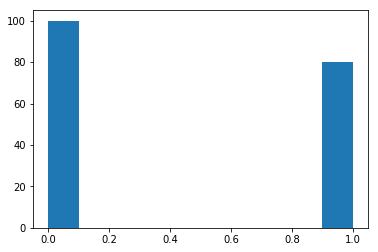

In [32]:
print('                    Average age: %s' %np.mean(train_data['age']))
print('                        Min age: %s' %np.min(train_data['age']))
print('                        Max age: %s' %np.max(train_data['age']))
print('                     Median age: %s' %np.median(train_data['age']))
print(' Average resting blood pressure: %s' %np.mean(train_data['resting_blood_pressure']))
print('Average max heart rate achieved: %s' %np.mean(train_data['max_heart_rate_achieved']))
print('      Average serum cholesterol: %s' %np.mean(train_data['serum_cholesterol_mg_per_dl']))
plt.hist(train_data['heart_disease_present'])

### Process Data

In [ ]:
#set target variable
y = train_data.heart_disease_present

#remove redundant column
train_data = train_data.drop(columns='patient_id')

#convert categorical values into binary values
train_data = pd.get_dummies(train_data, columns=['thal'], drop_first= True)

#split the data into 80% train, 20% test
train_features, test_features, train_labels, test_labels = train_test_split(train_data, y, test_size=0.2)

### Create Models

In [ ]:
LR_mdl = LogisticRegressionCV()
KN_mdl = KNeighborsClassifier()
NB_mdl = GaussianNB()

### Train Models

In [ ]:
%%time
print(LR_mdl.fit(train_features, train_labels.values))

In [ ]:
%%time
print(KN_mdl.fit(train_features, train_labels.values))

In [ ]:
%%time
print(NB_mdl.fit(train_features, train_labels.values))

### Test Models

In [ ]:
%%time
predicted1 = LR_mdl.predict(test_features)
print('Logistic Regression Model Accuracy: %s' % metrics.accuracy_score(test_labels,predicted1))

In [ ]:
%%time
predicted2 = KN_mdl.predict(test_features)
print('K Nearest Neighbors Model Accuracy: %s' % metrics.accuracy_score(test_labels,predicted2))

In [ ]:
%%time
predicted3 = NB_mdl.predict(test_features)
print('Naive Bayes Accuracy: %s' % metrics.accuracy_score(test_labels,predicted3))

### Conclusion

The Logistic Regression and Naive Bayes models significantly outperformed the K Nearest Neighbors model. This drastic difference in performance is likely to due to the number of neighbors (n = 5) was too high for such a small dataset. 